In [115]:
"""
다음 알고리즘들을 Python 으로 구현하고 한 개의 Jupyter notebook 파일에
저장하여 제출하라.
1. (10 점) 강의노트 연습문제 3.2 을 Python 으로 구현하여 풀어라
2. (2 점) 강의노트 연습문제 3.3 을 Python 으로 구현하여 풀어라.
3. (4 점) 강의노트 연습문제 4.3 을 Python 으로 구현하여 풀어라.
4. (4 점) 강의노트 연습문제 4.6 을 Python 으로 구현하여 풀어라.
"""

'\n다음 알고리즘들을 Python 으로 구현하고 한 개의 Jupyter notebook 파일에\n저장하여 제출하라.\n1. (10 점) 강의노트 연습문제 3.2 을 Python 으로 구현하여 풀어라\n2. (2 점) 강의노트 연습문제 3.3 을 Python 으로 구현하여 풀어라.\n3. (4 점) 강의노트 연습문제 4.3 을 Python 으로 구현하여 풀어라.\n4. (4 점) 강의노트 연습문제 4.6 을 Python 으로 구현하여 풀어라.\n'

In [116]:
import numpy as np
import numpy.linalg as linalg
from matplotlib import pyplot as plt
np.set_printoptions(precision=2)

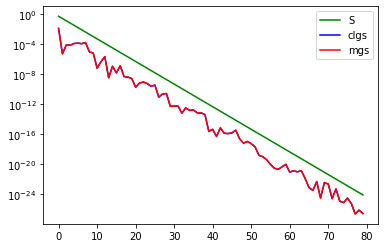

Norm of Rc - Rm = 0.0
Sign of each column is not identical to python QR method.
Cannot tell the difference from the result.
Theoretically modified is more stable.


In [117]:
# 1. (10 점) 강의노트 연습문제 3.2 을 Python 으로 구현하여 풀어라

# 1-a
def clgs(A):
    [m, n] = A.shape
    V = A.copy()
    Q = np.eye(m,n)
    R = np.zeros((n,n))
    for j in range(n):
        for i in range(j-1):
            R[i,j] = np.dot(Q[:,i].T.reshape(1,m),A[:,j].reshape(m,1))
            V[:,j] = V[:,j]-R[i,j]*Q[:,i]
        R[j,j] = linalg.norm(V[:,j])
        Q[:,j] = V[:,j] / R[j,j]
    return [Q,R]

def mgs(A):
    [m, n] = A.shape
    Q = A.copy()
    R = np.zeros((n,n))
    for i in range(n-1):
        R[i,i] = linalg.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        R[i,i+1:n] = np.dot(Q[:,i].T, Q[:,i+1:n])
        Q[:,i+1:n] = Q[:,i+1:n]-np.dot(Q[:,i].reshape(m,1),R[i,i+1:n].reshape(1,n-i-1))
    R[n-1,n-1] = linalg.norm(Q[:,n-1])
    Q[:,n-1] = Q[:,n-1]/R[n-1,n-1]
    return [Q,R]

[U, X] = linalg.qr(np.random.randn(80,80), 'complete')
[V, X] = linalg.qr(np.random.randn(80,80), 'complete')
J = np.arange(80)+1
S = np.diag((1/2)**(J))
A = U * S * V
Q_ans, R_ans = linalg.qr(A)
[Qc, Rc] = clgs(A)
[Qm, Rm] = mgs(A)
plt.plot(np.diag(S), color='green')
plt.plot(np.diag(Rc), color='blue')
plt.plot(np.diag(Rm), color='red')
plt.legend(['S', 'clgs', 'mgs'])
plt.yscale('log')
plt.show()
print('Norm of Rc - Rm = '+str(linalg.norm(np.diag(Rc)-np.diag(Rm))))
print("Sign of each column is not identical to python QR method.")
print("Cannot tell the difference from the result.")
print("Theoretically modified is more stable.")


In [195]:
# 1-b
def qrhouse(A):
    [m,n] = A.shape
    R = A.copy()
    V = np.zeros((m,n))
    for k in range(min(m-1,n)):
        x = R[k:m,k].reshape(m-k,1)
        v = x + np.sign(x[0]).item()*linalg.norm(x)*np.eye(m-k,1)
        V[k:m,k] = v.T
        v = v.reshape(m-k,1)
        R[k:m,k:n] = R[k:m,k:n]-np.dot((2*v),np.dot(v.T,R[k:m,k:n]))/np.dot(v.T,v)
    R = np.triu(R[0:n,0:n])
    return [V,R]

def formQ(V):
    [m,n] = V.shape
    Q = np.eye(m,m)
    for j in range(min(m-1,n)-1,0,-1):
        v = V[:,j].reshape(m,1)
        print("np.dot(v.T, v)")
        print(np.dot(v.T, v).shape)
        Q = Q - np.dot((2*v),(np.dot(v,Q)))/np.dot(v.T,v)
    return Q

def Qtb(V,b):
    [m,n] = V.shape
#     for j in range(min(m-1,n)):
#         v = V[j:m,j]
#         v = v.reshape(m-j,1)
#         b[j:m] = b[j:m]-np.dot((2*v),np.dot(v.T, b[j:m]))/np.dot(v.T, v)
    r = min(m,n)
    for j in range(r):
        v = V[j:r,j]
        v = v.reshape(r-j,1)
        b[j:r] = b[j:r]-np.dot((2*v),np.dot(v.T, b[j:r]))/np.dot(v.T, v)
    return b[0:r]

A = np.array([[0.7, 0.70711],
     [0.70001, 0.70711]])
A = np.matrix(A)
[Qm, Rm] = mgs(A)
[V, R] = qrhouse(A);
Q = formQ(V)

print('householder error: ')
print(linalg.norm(Q.T*Q-np.eye(2)))
print('modified error: ')
print(linalg.norm(Qm.T*Qm-np.eye(2)))
print("-->Householder is more numerially stable")

householder error: 
0.0
modified error: 
3.254726094493924e-11
-->Householder is more numerially stable


In [119]:
# 2. (2 점) 강의노트 연습문제 3.3 을 Python 으로 구현하여 풀어라.

def givens(A):
    [m,n] = A.shape
    Q = np.eye(m)
    R = A.copy()
    # Givens rotation
    for k in range(n):
        for i in  range(m-1,k,-1):
            G = np.eye(m)
            x = [R[i,k], R[i-1,k]]
            c = R[i-1,k]/linalg.norm(x)
            s = R[i,k]/linalg.norm(x)
            G[i-1,i-1] = c
            G[i,i] = c
            G[i,i-1] = -s
            G[i-1,i] = s
            R = np.dot(G,R)
            Q = np.dot(Q,G.T)
    return [Q,R]

def test_givens(m,n):
    A = np.random.randn(m,n)
    [Q,R] = givens(A)
    [Q_ans, R_ans] = linalg.qr(A, 'complete')
    print("Sign of each columns are not identical to numpy qr function.")
    print("Q is not identical to numpy qr function when column number is bigger than n.")
    print("Q : ")
    print(Q)
    print("Q_answer : ")
    print(Q_ans)
    print("R : ")
    print(R)
    print("R_answer : ")
    print(R_ans)
    print("norm(Q.T*Q-eye) = "+str(linalg.norm(np.dot(Q.T,Q)-np.eye(m))))
    print("norm(|R|-|R_ans|) = "+str(linalg.norm(abs(R)-abs(R_ans))))
    print("norm(A - Q*R) = "+str(linalg.norm(A-np.dot(Q,R))))

test_givens(8,6)

Sign of each columns are not identical to numpy qr function.
Q is not identical to numpy qr function when column number is bigger than n.
Q : 
[[-0.41  0.2   0.39 -0.72 -0.19  0.24  0.18  0.  ]
 [-0.57 -0.02 -0.11  0.06  0.26 -0.34 -0.09  0.68]
 [-0.14 -0.02  0.14 -0.06 -0.37 -0.81 -0.18 -0.37]
 [ 0.54 -0.02  0.07 -0.36 -0.24 -0.06 -0.51  0.5 ]
 [ 0.2   0.59 -0.51 -0.12 -0.19 -0.22  0.48  0.15]
 [-0.15 -0.34 -0.02  0.31 -0.78  0.19  0.24  0.26]
 [ 0.09 -0.7  -0.4  -0.47  0.14 -0.14  0.29 -0.06]
 [ 0.34 -0.1   0.63  0.11  0.19 -0.27  0.55  0.24]]
Q_answer : 
[[-0.41  0.2  -0.39 -0.72 -0.19 -0.24  0.1   0.15]
 [-0.57 -0.02  0.11  0.06  0.26  0.34 -0.62  0.29]
 [-0.14 -0.02 -0.14 -0.06 -0.37  0.81  0.22 -0.35]
 [ 0.54 -0.02 -0.07 -0.36 -0.24  0.06 -0.69 -0.16]
 [ 0.2   0.59  0.51 -0.12 -0.19  0.22  0.13  0.49]
 [-0.15 -0.34  0.02  0.31 -0.78 -0.19 -0.09  0.34]
 [ 0.09 -0.7   0.4  -0.47  0.14  0.14  0.2   0.21]
 [ 0.34 -0.1  -0.63  0.11  0.19  0.27  0.09  0.59]]
R : 
[[ 3.00e+00 -1.54e+00 

3 a.-------------------------------------


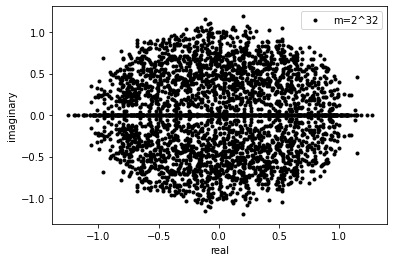

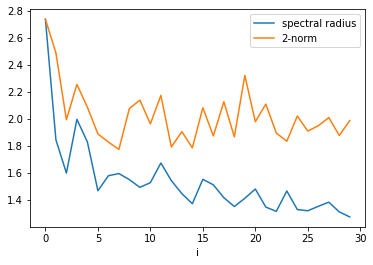

The eigenvalues form a shape of circle.
Some eigenvalues are real number, and they form a line in the middle of the graph.
As the m goes larger, spectral radius vibrate but goes down.
It doesn't go lower than 1.2
3 b.-------------------------------------
Not like spectral radius, 2-norm doesn't go down and vibrate around 2.0
Gap between 2-norm and spectral radius does not narrow down.
3 c.-------------------------------------


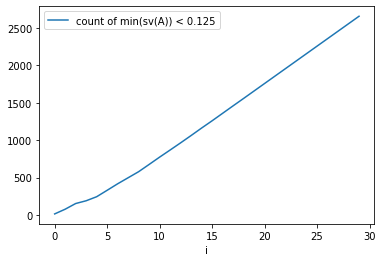

It is proportianal to i. That is, count of min(sv(A)) is proportional to log(m)


In [120]:
# 3. (4 점) 강의노트 연습문제 4.3 을 Python 으로 구현하여 풀어라.
# 3-a, 3-b
sr_group = []
norm_group = []
sv_group = []
sv_count_group = []
for i in range(30):
    m = 2^(i+3)
    sr = 0
    norm = 0
    for j in range(100):
        A = np.random.randn(m,m)/np.sqrt(m)
        Q, R = linalg.qr(A)
        eig = linalg.eig(A)[0]
        if i==29:
            plt.plot(eig.real, eig.imag, ".", color="black")
        for e in eig:
            if sr < np.abs(e):
                sr = np.abs(e)
                norm = linalg.norm(A, ord=2)
        min_sv = min(linalg.svd(A)[1])
        if min_sv < 0.125:
            sv_group.append(min_sv)
    sv_count_group.append(len(sv_group))
    sr_group.append(sr)
#    plt.hist(sv_count_group, bins=10)
#    plt.show()
    norm_group.append(norm)
    
print('3 a.-------------------------------------')
plt.ylabel('imaginary')
plt.xlabel('real')
plt.legend(['m=2^32'])
plt.show()
plt.plot(sr_group)
plt.plot(norm_group)
plt.xlabel('i')
plt.legend(['spectral radius', '2-norm'])
plt.show()
print("The eigenvalues form a shape of circle.")
print("Some eigenvalues are real number, and they form a line in the middle of the graph.")
print("As the m goes larger, spectral radius vibrate but goes down.")
print("It doesn't go lower than 1.2")
print('3 b.-------------------------------------')
print("Not like spectral radius, 2-norm doesn't go down and vibrate around 2.0")
print("Gap between 2-norm and spectral radius does not narrow down.")
print('3 c.-------------------------------------')
plt.plot(sv_count_group)
plt.legend(["count of min(sv(A)) < 0.125"])
plt.xlabel('i')
plt.show()
print("It is proportianal to i. That is, count of min(sv(A)) is proportional to log(m)")


3 d.-------------------------------------


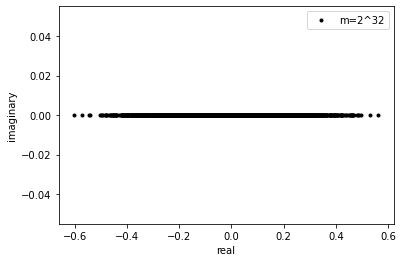

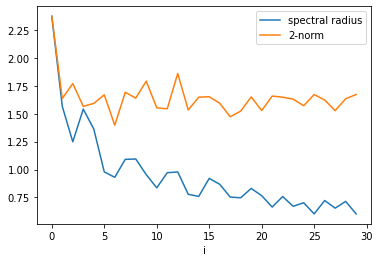

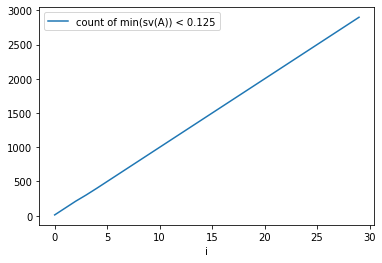

Eigenvalues are all real number.
It has smaller spectral radius when m is bigger.
count of minimum sv under 1/8 is directly proportional to log(m) even when m is small.


In [121]:
# 3. (4 점) 강의노트 연습문제 4.3 을 Python 으로 구현하여 풀어라.
# 3-d
print('3 d.-------------------------------------')
sr_group = []
norm_group = []
sv_group = []
sv_count_group = []
for i in range(30):
    m = 2^(i+3)
    sr = 0
    norm = 0
    for j in range(100):
        A = np.random.randn(m,m)/np.sqrt(m)
        A = np.triu(A)
        Q, R = linalg.qr(A)
        eig = linalg.eig(A)[0]
        if i==29:
            plt.plot(eig.real, eig.imag, ".", color="black")
        for e in eig:
            if sr < np.abs(e):
                sr = np.abs(e)
                norm = linalg.norm(A, ord=2)
        min_sv = min(linalg.svd(A)[1])
        if min_sv < 0.125:
            sv_group.append(min_sv)
    sv_count_group.append(len(sv_group))
    sr_group.append(sr)
#    plt.hist(sv_count_group, bins=10)
#    plt.show()
    norm_group.append(norm)
    
plt.ylabel('imaginary')
plt.xlabel('real')
plt.legend(['m=2^32'])
plt.show()
plt.plot(sr_group)
plt.plot(norm_group)
plt.xlabel('i')
plt.legend(['spectral radius', '2-norm'])
plt.show()
plt.plot(sv_count_group)
plt.legend(["count of min(sv(A)) < 0.125"])
plt.xlabel('i')
plt.show()
print('Eigenvalues are all real number.')
print('It has smaller spectral radius when m is bigger.')
print('count of minimum sv under 1/8 is directly proportional to log(m) even when m is small.')

In [208]:
# 4. (4 점) 강의노트 연습문제 4.6 을 Python 으로 구현하여 풀어라.
from scipy.linalg import solve_triangular

# (a)
m = 50
n = 12
t = np.linspace(0,1,m)
A = np.fliplr(np.vander(t, N=n))
b = np.cos(4*t)
b = b.reshape(m,1)
np.set_printoptions(precision=15)
x_ans = linalg.solve(np.dot(A.T,A),np.dot(A.T,b))
print("x_ans")
print(x_ans.T)

# (b)
[Q_mgs, R_mgs] = mgs(A)
x_mgs = linalg.solve(R_mgs, np.dot(Q_mgs.T,b))
print("x_mgs")
print(x_mgs.T)

# (c)
[V_qrhouse, R_qrhouse] = qrhouse(A)
c_qrhouse = Qtb(V_qrhouse.T, b)
x_qrhouse = linalg.solve(R_qrhouse, c_qrhouse)
print("x_qrhouse")
print(x_qrhouse.T)

# (d)
[Q_python, R_python] = linalg.qr(A)
x_python = linalg.solve(R_python, np.dot(Q_python.T,b))
print("x_python")
print(x_python.T)

# (f)
[U, s, V] = linalg.svd(A, full_matrices = True)
S = np.zeros((m,n))
S[0:n, :] = np.diag(s)
x_svd = np.dot(np.dot(np.dot(V,linalg.pinv(S)),U.T),b)
print("x_svd")
print(x_svd.T)

# (g)

x_ans
[[ 9.999999744776106e-01  7.528071855297055e-06 -8.000281842471642e+00
   4.131668308340867e-03  1.063523390550039e+01  1.409654970626616e-01
  -6.087019823254116e+00  7.320591319319560e-01  7.379467675232624e-01
   7.105920826153672e-01 -6.684804955927917e-01  1.412020053415137e-01]]
x_mgs
[[ 1.000000001155032e+00 -4.582401042832889e-07 -7.999980090908919e+00
  -3.334378138846180e-04  1.066952900052319e+01 -1.420850859619597e-02
  -5.646110928370134e+00 -7.686322241221696e-02  1.695204699446828e+00
   5.007615542323303e-03 -3.738713011745829e-01  8.798301134833630e-02]]
x_qrhouse
[[ 9.770042855696948e-02  7.895392115095692e+01 -2.583392262164764e+03
   3.559709142162701e+04 -2.568784915538714e+05  1.087603174264759e+06
  -2.886257968163663e+06  4.954940432085472e+06 -5.511883724005518e+06
   3.842600336506479e+06 -1.527832998649068e+06  2.646161693359964e+05]]
x_python
[[-9.991928180489673e-01 -8.352467639400277e+00  5.146949140138730e+02
  -1.001279586868021e+04  9.182833511115